In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Carica il dataset Iris come DataFrame
iris = load_iris(as_frame=True)
# Seleziona solo le feature "petal length" e "petal width"
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
# Crea il target binario: True se è "Iris-setosa", altrimenti False
y = (iris.target == 0)
# Inizializza il modello Perceptron con un seed fisso per la riproducibilità
per_clf = Perceptron(random_state=42)
# Allena il Perceptron sui dati selezionati
per_clf.fit(X, y)
# Nuovi esempi da classificare (lunghezza e larghezza del petalo)
X_new = [[2, 0.5], [3, 1]]
# Predice se i nuovi fiori sono "Iris-setosa" (True) o no (False)
y_pred = per_clf.predict(X_new)




In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# --- Caricamento del dataset California Housing ---
housing = fetch_california_housing()
X = housing.data            # Feature (es. numero di stanze, popolazione, ecc.)
y = housing.target          # Target: valore medio delle case in una zona

# --- Suddivisione dei dati in training, validation e test ---
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)  # 75% train+valid, 25% test
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)  # 56.25% train, 18.75% valid

# --- Definizione del modello MLP ---
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],  # Tre hidden layer da 50 neuroni ciascuno
    activation='relu',                # Funzione di attivazione ReLU
    solver='adam',                    # Ottimizzatore Adam
    alpha=0.0001,                     # Termina di regolarizzazione L2 (per evitare overfitting)
    max_iter=500,                     # Iterazioni massime
    random_state=42                   # Seed per riproducibilità
)

# --- Creazione della pipeline ---
# Include uno StandardScaler per normalizzare le feature (molto importante per MLP)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# --- Addestramento del modello ---
pipeline.fit(X_train, y_train)

# --- Predizione e valutazione sul validation set ---
y_pred = pipeline.predict(X_valid)                                  # Predizioni sul set di validazione
rmse = sqrt(mean_squared_error(y_valid, y_pred))          # Calcolo della Root Mean Squared Error

# --- Stampa dell'errore ---
print(f"Root Mean Squared Error (Validation): {rmse:.3f}")

Root Mean Squared Error (Validation): 0.505


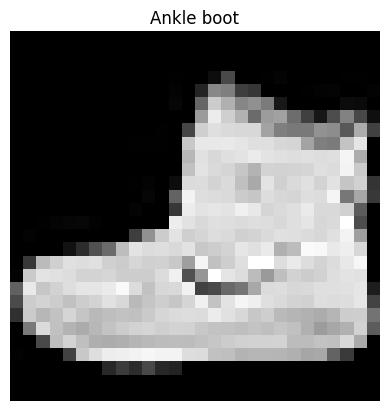

In [7]:
import tensorflow as tf  # Importa TensorFlow, una libreria per costruire e addestrare reti neurali

# --- Caricamento del dataset Fashion MNIST ---
# Fashion MNIST è un dataset con immagini 28x28 pixel in scala di grigi di vestiti (10 categorie)
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Carica i dati e li divide in set di training e test
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# --- Suddivisione in sottoinsiemi: training e validation ---
# Prende tutti i dati tranne gli ultimi 5000 per addestrare (training)
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

# Gli ultimi 5000 dati vengono usati per la validazione (validation)
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# --- Normalizzazione dei pixel ---
# I pixel vanno da 0 a 255: qui li convertiamo in valori da 0.0 a 1.0 (per aiutare l'apprendimento)
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# --- Etichette delle classi ---
# Questo array associa il numero di ogni etichetta (0-9) al nome del capo d'abbigliamento
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# --- Visualizzazione della prima etichetta del training set ---
# Questa riga mostra il nome del capo corrispondente alla prima immagine del training set
class_names[y_train[0]]

#per vedere l immagine associata
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="gray")
plt.title(class_names[y_train[0]])
plt.axis("off")
plt.show()

In [9]:
import tensorflow as tf  # Importa TensorFlow

tf.random.set_seed(42)  # Imposta un seme per la casualità (utile per ripetere gli stessi risultati)

# --- Definizione del modello neurale ---
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),         # Input: immagini 28x28 (come nel dataset Fashion MNIST)
    
    tf.keras.layers.Flatten(),              # Appiattisce l'immagine 28x28 in un vettore di 784 valori (28*28)
    
    tf.keras.layers.Dense(300, activation="relu"),  # Primo strato pienamente connesso (dense) con 300 neuroni e ReLU
    tf.keras.layers.Dense(100, activation="relu"),  # Secondo strato denso con 100 neuroni e ReLU
    
    tf.keras.layers.Dense(10, activation="softmax") # Output: 10 neuroni (uno per ogni classe), softmax per probabilità
])

# --- Mostra un riepilogo del modello ---
model.summary()  # Stampa la struttura del modello: numero di parametri, forma degli strati, ecc.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)